Hi, I'm going to apply 5 supervised machine learning classification models and an ANN model on the given dataset to classify mushrooms as poisonous or eatable.

Support Vector machines (SVC)

K-Nearest Neighbours(K-NN)

Naive Bayes classifier

Decision Tree Classifier

Random Forest Classifier

Artificial Neural Networks

I'll proceed by converting categorical variables into dummy/indicator variables, then reducing dimensions using Princple Component Analysis to reduce 23 categorical variables (which will become 95 variables after conversion) to only 2 variables (Principle Components) and training different classification models over these two principle components. Finally, I'll visualize the outputs so that decision boundaries of different models can be seen in 2D-plane.

# Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Dataset

In [2]:
dataset=pd.read_csv("mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Checking for nulls

In [3]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Info of Dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

# Description of Dataset

In [5]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Class column is response and rest columns are predictors.
# Seprating Predictors and Response

In [7]:
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


# Encoding categorical data
Label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [9]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [10]:
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

Poisonous = 1

Eatable = 0

# Getting dummy variables

In [11]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 95 columns):
cap-shape_1                   8124 non-null uint8
cap-shape_2                   8124 non-null uint8
cap-shape_3                   8124 non-null uint8
cap-shape_4                   8124 non-null uint8
cap-shape_5                   8124 non-null uint8
cap-surface_1                 8124 non-null uint8
cap-surface_2                 8124 non-null uint8
cap-surface_3                 8124 non-null uint8
cap-color_1                   8124 non-null uint8
cap-color_2                   8124 non-null uint8
cap-color_3                   8124 non-null uint8
cap-color_4                   8124 non-null uint8
cap-color_5                   8124 non-null uint8
cap-color_6                   8124 non-null uint8
cap-color_7                   8124 non-null uint8
cap-color_8                   8124 non-null uint8
cap-color_9                   8124 non-null uint8
bruises_1                     8124 non-null

# Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA with n_components = 2

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Artificial Neural Networks (ANN)
Let's try Arificial Neural Network first ;)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [19]:
classifier = Sequential()
classifier.add(Dense(2, kernel_initializer='uniform', activation= 'relu', input_dim = 2))
classifier.add(Dense(2, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
5686/5686 [==============================] - 1s 185us/step - loss: 0.6198 - acc: 0.6665
Epoch 2/10
5686/5686 [==============================] - 0s 64us/step - loss: 0.4775 - acc: 0.8890
Epoch 3/10
5686/5686 [==============================] - 0s 64us/step - loss: 0.4239 - acc: 0.8994
Epoch 4/10
5686/5686 [==============================] - 0s 65us/step - loss: 0.3917 - acc: 0.9038
Epoch 5/10
5686/5686 [==============================] - 0s 68us/step - loss: 0.3707 - acc: 0.9064
Epoch 6/10
5686/5686 [==============================] - 0s 65us/step - loss: 0.3558 - acc: 0.9064
Epoch 7/10
5686/5686 [==============================] - 0s 62us/step - loss: 0.3446 - acc: 0.9063
Epoch 8/10
5686/5686 [==============================] - 0s 55us/step - loss: 0.3357 - acc: 0.9073
Epoch 9/10
5686/5686 [==============================] - 0s 54us/step - loss: 0.3292 - acc: 0.9064
Epoch 10/10
5686/5686 [==============================] - 0s 54us/step - loss: 0.3229 - acc: 0.9070


Predicting the Test Set Results

In [20]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

# Confusion Matrix

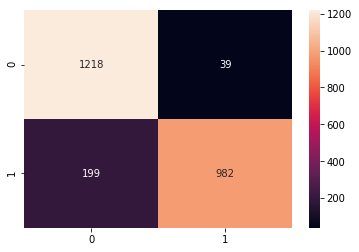

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cm = sns.heatmap(cm,annot=True,fmt="d")

# Classification Report

In [25]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1257
          1       0.96      0.83      0.89      1181

avg / total       0.91      0.90      0.90      2438



# Visualizing ANN Training Set results

In [50]:
def vis(x,y,model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('ANN (Training set)')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

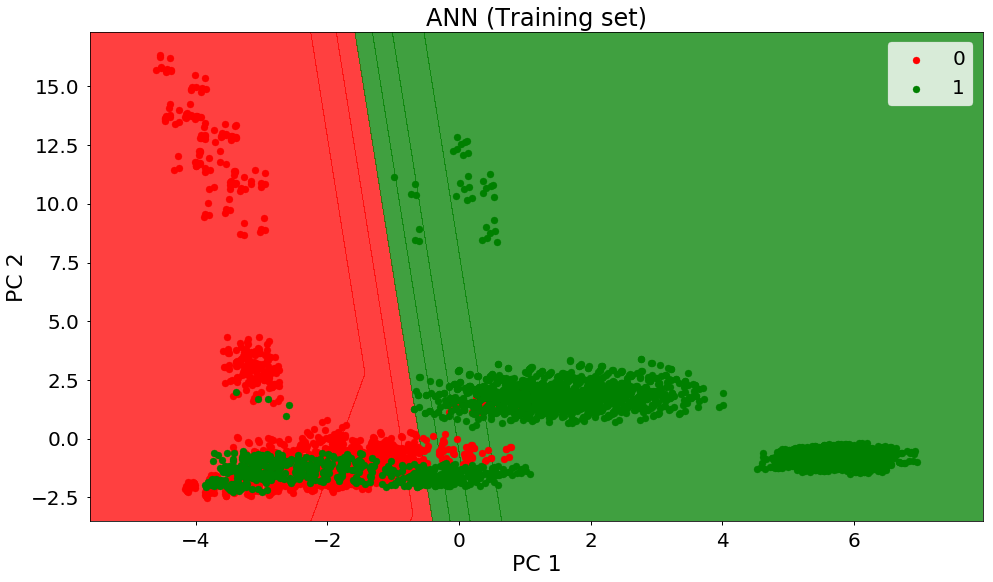

In [51]:
vis(X_train,y_train,classifier)

# Visualizing ANN Test Set Results

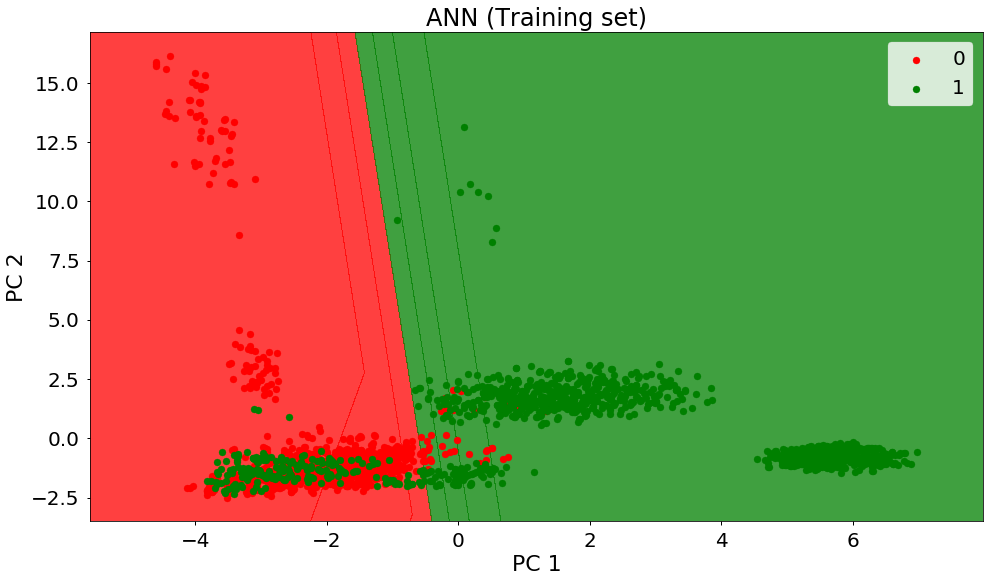

In [52]:
vis(X_test,y_test,classifier)

# Support Vecor (SVC) Classification Model

In [53]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel='rbf',random_state=42)

classifier_SVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
y_pred=classifier_SVC.predict(X_test)

# Confusion Matrix

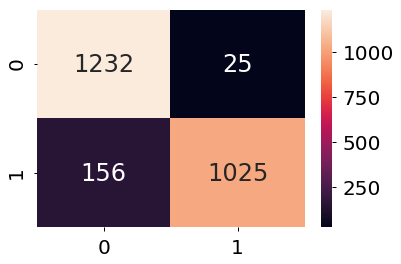

In [55]:
cm = confusion_matrix(y_test, y_pred)
cm = sns.heatmap(cm,annot=True,fmt="d")

In [56]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1257
          1       0.98      0.87      0.92      1181

avg / total       0.93      0.93      0.93      2438



# Visualising the SVC Training set results

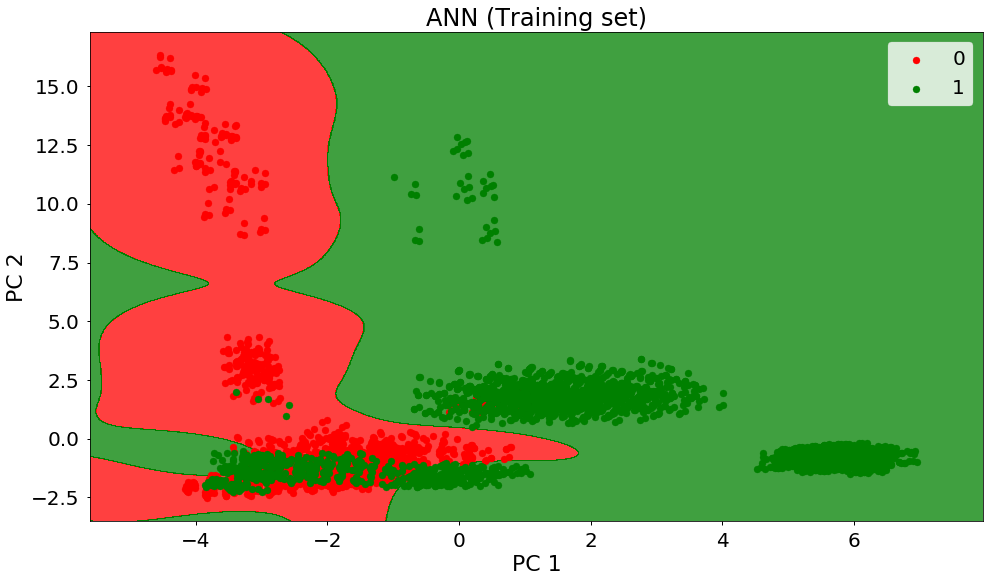

In [57]:
vis(X_train,y_train,classifier_SVC)

# Visualising the SVC Test set results

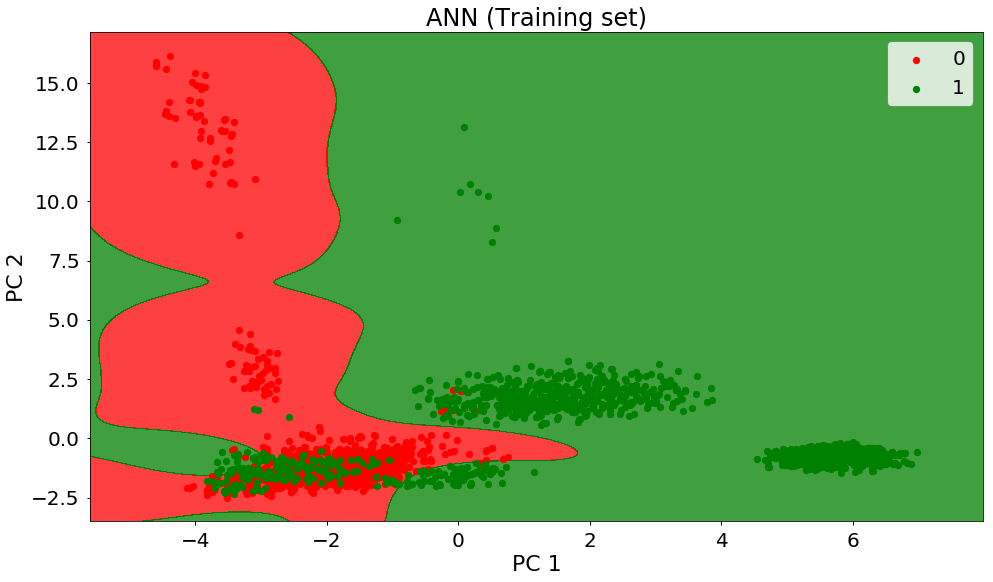

In [58]:
vis(X_test,y_test,classifier_SVC)

# K Nearest Neighbors (K-NN) Classification Model

In [59]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier_KNN = KNN()
classifier_KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
y_pred=classifier_KNN.predict(X_test)

# Confusion Matrix

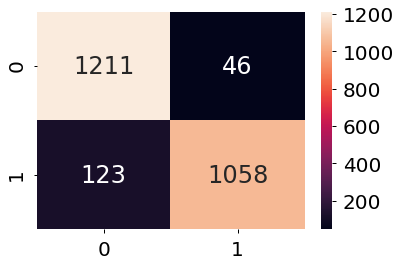

In [64]:
cm = confusion_matrix(y_test, y_pred)
cm = sns.heatmap(cm,annot=True,fmt="d")

In [65]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1257
          1       0.96      0.90      0.93      1181

avg / total       0.93      0.93      0.93      2438



# Visualising the K-NN Training set results

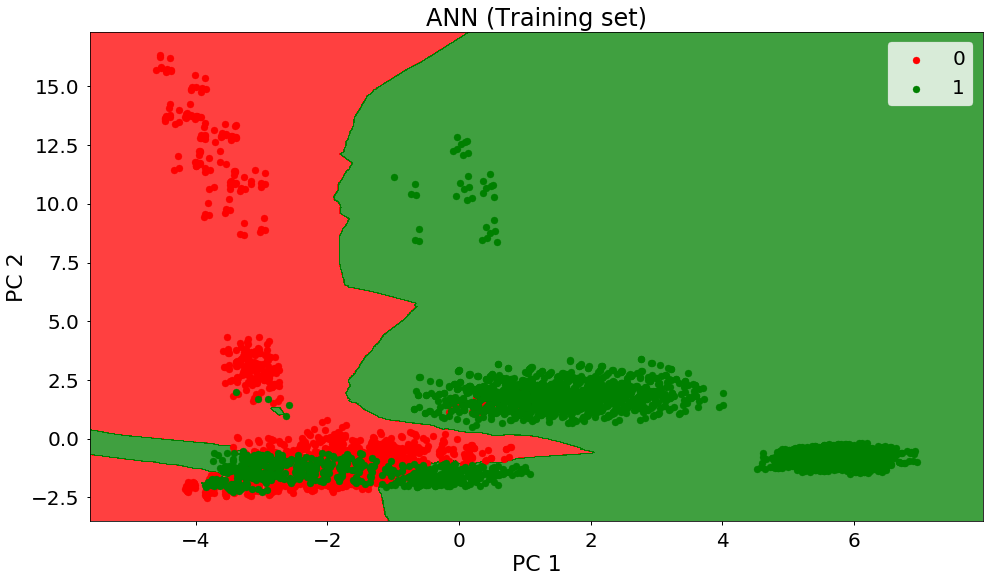

In [66]:
vis(X_train,y_train,classifier_KNN)

# Visualising the K-NN Test set results

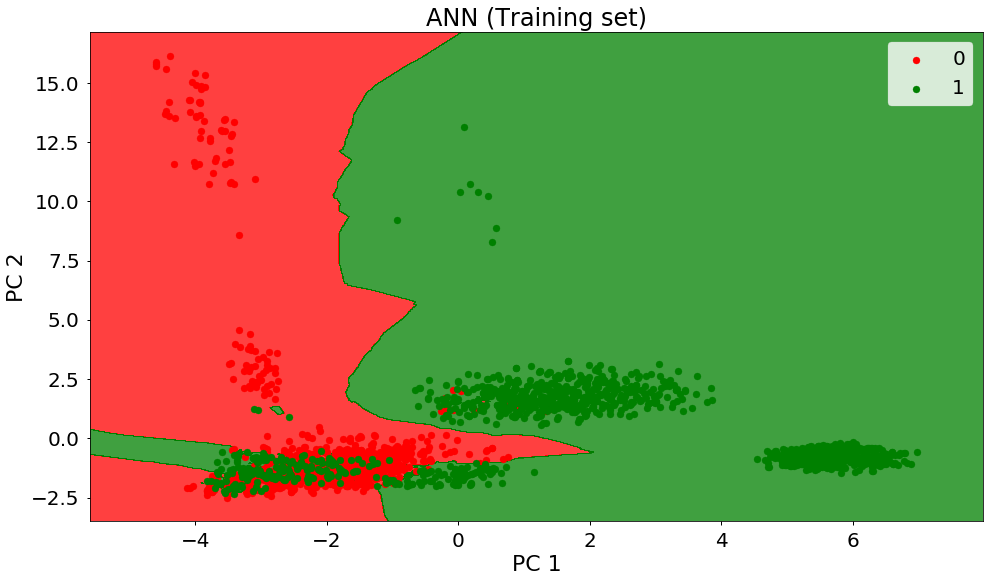

In [67]:
vis(X_test,y_test,classifier_KNN)

# Naive Bayes Classification Model

In [68]:
from sklearn.naive_bayes import GaussianNB as NB

classifier_NB = NB()
classifier_NB.fit(X_train,y_train)

GaussianNB(priors=None)

In [69]:
y_pred=classifier_NB.predict(X_test)

# Confusion Matrix

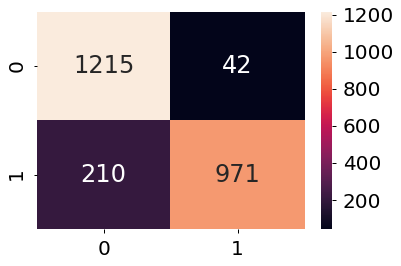

In [70]:
cm = confusion_matrix(y_test, y_pred)
cm = sns.heatmap(cm,annot=True,fmt="d")

In [71]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      0.97      0.91      1257
          1       0.96      0.82      0.89      1181

avg / total       0.90      0.90      0.90      2438



# Visualising the Naive Bayes Training set results

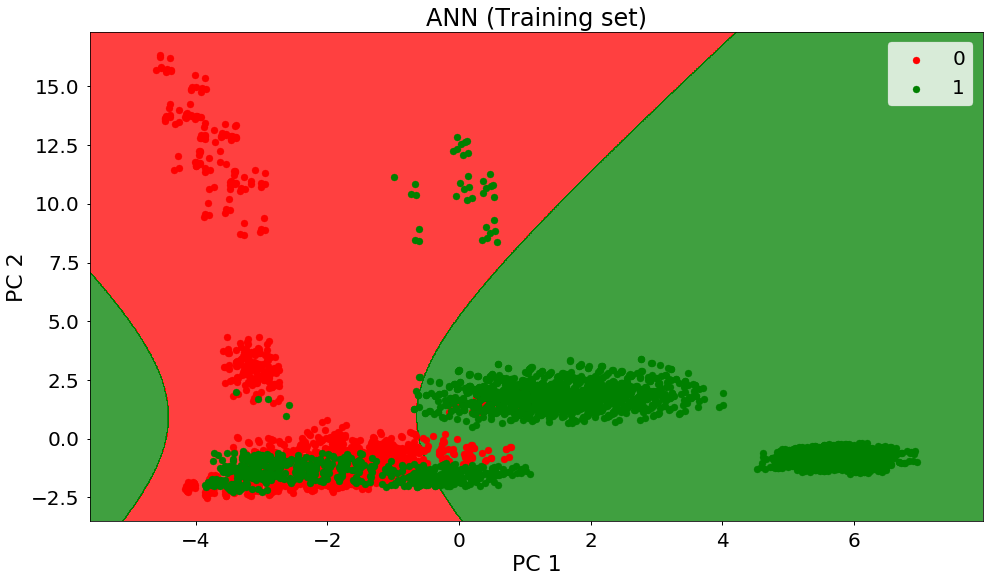

In [72]:
vis(X_train,y_train,classifier_NB)

# Visualising the Naive bayes Test set results

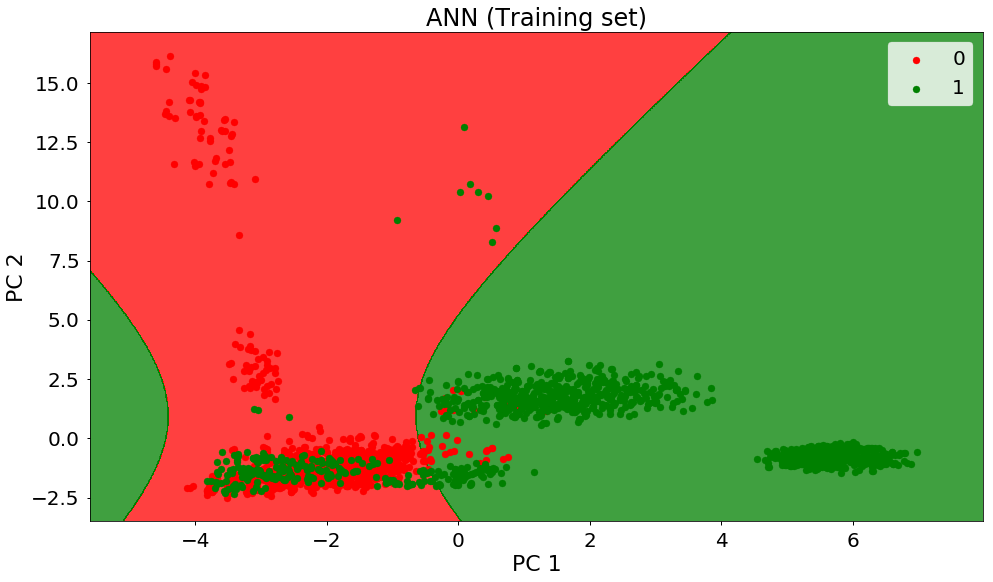

In [73]:
vis(X_test,y_test,classifier_NB)

# Decision Tree Classification Model

In [74]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier_DTree = DT(criterion='entropy',random_state=42)
classifier_DTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [75]:
y_pred=classifier_DTree.predict(X_test)

# Confusion Matrix

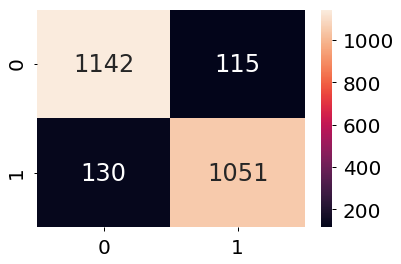

In [76]:
cm = confusion_matrix(y_test, y_pred)
cm = sns.heatmap(cm,annot=True,fmt="d")

In [77]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.90      0.91      0.90      1257
          1       0.90      0.89      0.90      1181

avg / total       0.90      0.90      0.90      2438



# Visualising the Decision tree Training set results

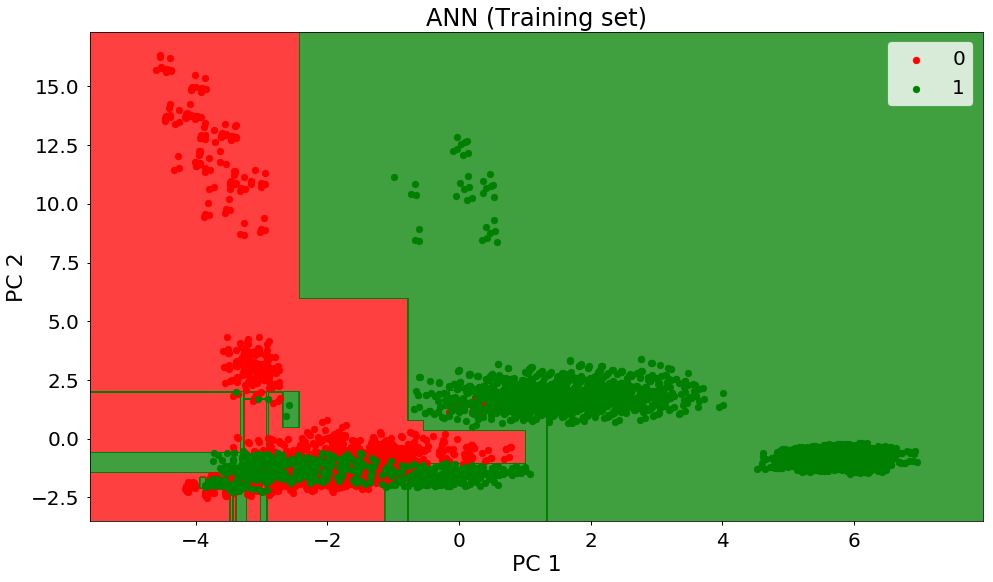

In [78]:
vis(X_train,y_train,classifier_DTree)

# Visualising the Decision Tree Test set results

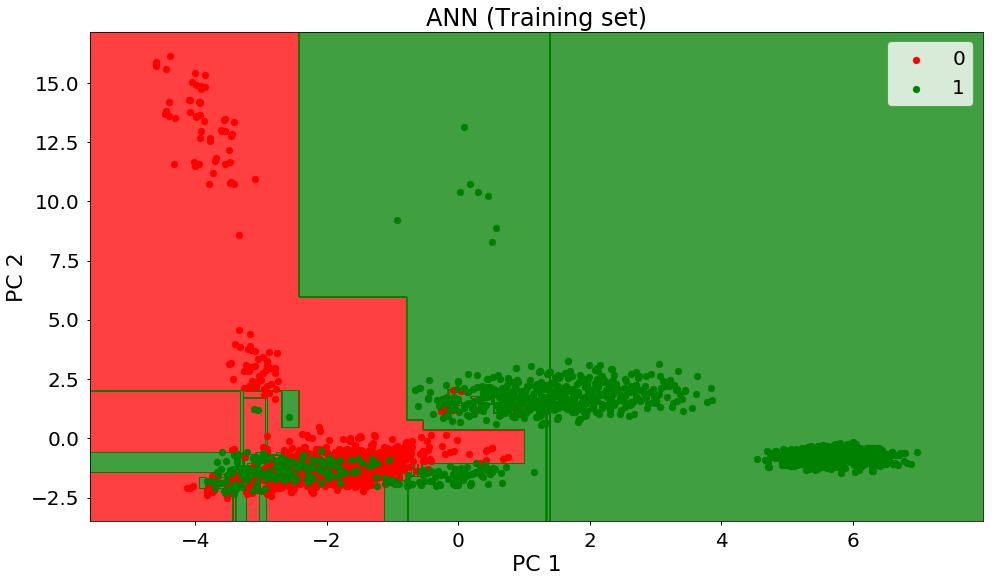

In [79]:
vis(X_test,y_test,classifier_DTree)

# Random Forest Classification Model

In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [82]:
y_pred = classifier_RF.predict(X_test)

# Confusion Matrix

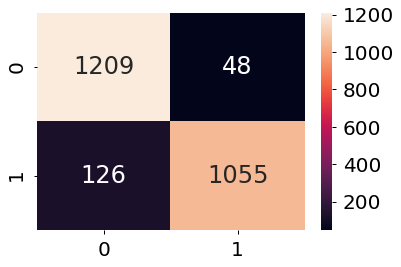

In [83]:
cm = confusion_matrix(y_test, y_pred)
cm = sns.heatmap(cm,annot=True,fmt="d")

In [84]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1257
          1       0.96      0.89      0.92      1181

avg / total       0.93      0.93      0.93      2438



# Visualising the Random Forest Training set results

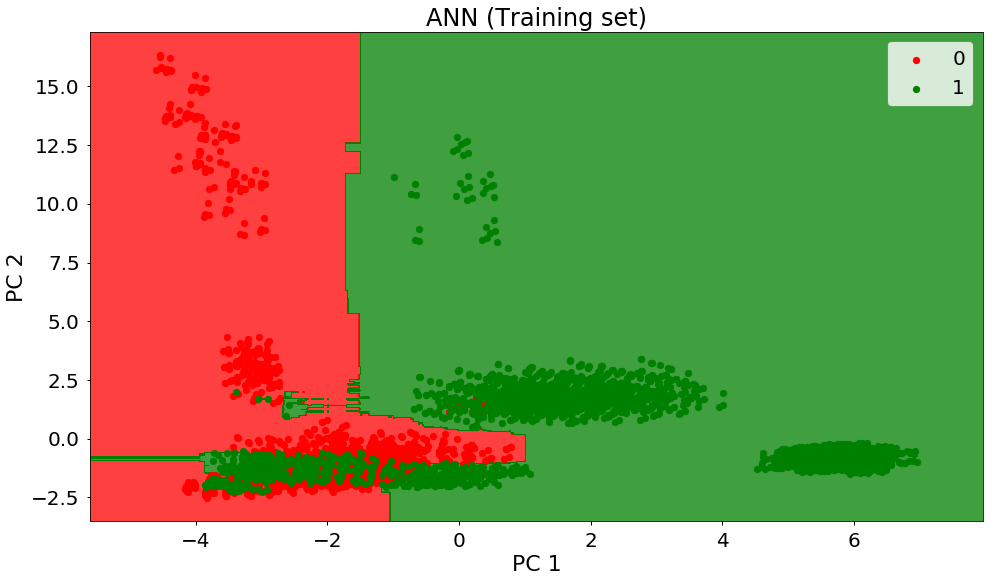

In [85]:
vis(X_train,y_train,classifier_RF)

# Visualising the Random Forest Test set results

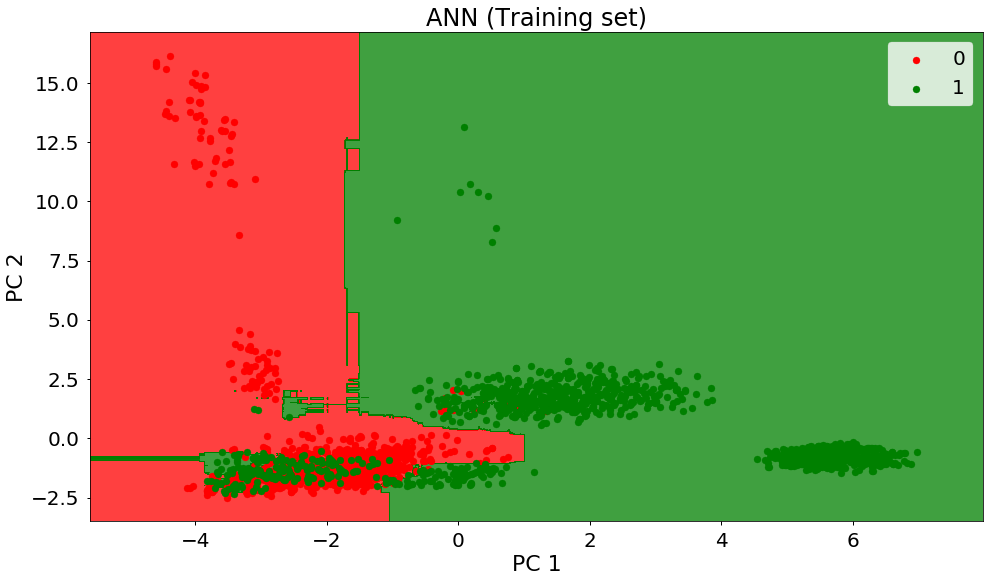

In [86]:
vis(X_test,y_test,classifier_RF)